<p style="color:green; font-size:20px; font-weight:bold;">
These imports are essential as we’ll use them throughout the project
</p>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv(r"C:\Users\muham\Downloads\homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
17,1540,3,60.0
16,1180,3,48.0
3,1521,3,75.0
8,1310,3,50.0
12,1000,2,38.0


<p style="color:blue; font-size:20px; font-weight:bold;">
This code normalizes all input features (except the target) to a 0–1 range, preparing them for faster and more stable model training.
</p>

In [9]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis = 'columns'))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [10]:
w = np.ones(shape=(2))

In [11]:
scaled_X.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [12]:
np.dot(w, scaled_X.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [13]:
a = np.array([1,2,3])
b = np.array([10,5,7])
a-b

array([-9, -3, -4])

In [14]:
np.mean(np.square(a-b))

np.float64(35.333333333333336)

This code standardizes features and target, then trains a linear regression model using batch gradient descent to learn weights and bias while minimizing mean squared error.

In [15]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Example dataset (features and labels)
X = np.array([[1, 1],
              [2, 2],
              [3, 3],
              [4, 4]], dtype=float)

y = np.array([2, 4, 6, 8], dtype=float)   # target values

# Scale features
scaler_X = StandardScaler()
scaled_X = scaler_X.fit_transform(X)

# Scale target
scaler_y = StandardScaler()
scaled_y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Your batch gradient descent function (already corrected earlier)
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]

    w = np.ones(shape=(number_of_features,))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(X, w) + b

        w_grad = -(2/total_samples) * (X.T.dot(y_true - y_predicted))
        b_grad = -(2/total_samples) * np.sum(y_true - y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true - y_predicted))

        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

# Run training
w, b, cost, cost_list, epoch_list = batch_gradient_descent(
    scaled_X,
    scaled_y,
    epochs=500
)

print("Weights:", w)
print("Bias:", b)
print("Final Cost:", cost)


Weights: [0.5 0.5]
Bias: 2.7755575615628914e-19
Final Cost: 2.0262391064768183e-18


We plot the cost versus epochs to visualize how the model’s error decreases during training.

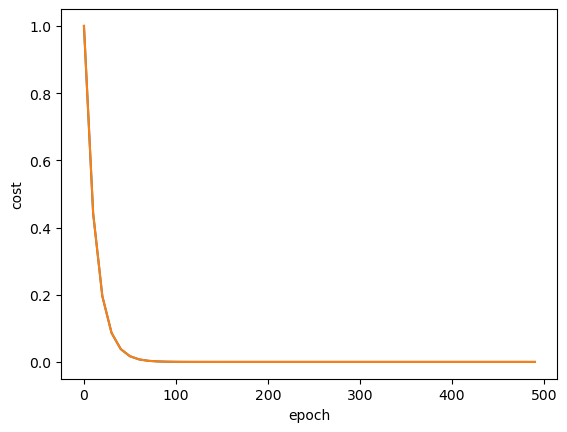

In [17]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)
plt.show()

In [33]:
sx.transform([[2600,4]])

C:\Users\muham\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.62068966, 0.75      ]])

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  # create scaler
scaler.min_, scaler.scale_ = 0, 1  # dummy values to avoid fitting
scaler.inverse_transform([[1]])  # now this works


array([[1.]])

This code fits a MinMaxScaler to the target values (prices) and demonstrates how to convert a scaled value back to the original price using inverse_transform.

In [37]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Target values (prices)
y = np.array([200000, 250000, 300000, 350000])

sy = MinMaxScaler()
sy.fit(y.reshape(-1, 1))  # reshape to 2D

# Example scaled value
scaled_price = 0.5
original_price = sy.inverse_transform([[scaled_price]])
print(original_price)


[[275000.]]


In [39]:
predict(1000,2,w,b)

C:\Users\muham\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[223922.41382579]])

In [40]:
predict(1500,3,w,b)

C:\Users\muham\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[255603.44835185]])

In [42]:
import random
random.randint(0,6)

6

This function trains a linear regression model using stochastic gradient descent, updating weights and bias for one random sample per iteration, and tracks the mean squared error every 100 epochs.

In [44]:
import numpy as np

def stochastic_gradient_descent(X, y, epochs=10000, learning_rate=0.01, verbose=False):
    """
    Vectorized SGD for linear regression.
    
    Parameters:
    X : np.array, shape (n_samples, n_features)
        Feature matrix (already scaled if needed)
    y : np.array, shape (n_samples,)
        Target values
    epochs : int
        Number of iterations
    learning_rate : float
        Learning rate
    verbose : bool
        If True, prints cost every 100 iterations
        
    Returns:
    w : np.array, shape (n_features,)
        Learned weights
    b : float
        Learned bias
    cost_list : list
        List of cost recorded every 100 iterations
    """
    
    n_samples, n_features = X.shape
    w = np.ones(n_features)
    b = 0
    cost_list = []
    
    for i in range(epochs):
        # Pick a random sample
        idx = np.random.randint(0, n_samples)
        x_i = X[idx]
        y_i = y[idx]
        
        # Prediction
        y_pred = np.dot(w, x_i) + b
        
        # Gradients
        w_grad = -2 * x_i * (y_i - y_pred)
        b_grad = -2 * (y_i - y_pred)
        
        # Update weights and bias
        w -= learning_rate * w_grad
        b -= learning_rate * b_grad
        
        # Record cost every 100 iterations
        if i % 100 == 0:
            y_pred_all = np.dot(X, w) + b
            cost = np.mean((y - y_pred_all) ** 2)
            cost_list.append(cost)
            if verbose:
                print(f"Epoch {i}: Cost={cost}")
    
    return w, b, cost_list


This code runs stochastic gradient descent on the scaled data to learn the model’s weights and bias, printing the final weights, bias, and last recorded cost.

In [45]:
# Make sure scaled_X and scaled_y are defined
w_sgd, b_sgd, cost_list_sgd = stochastic_gradient_descent(
    scaled_X, scaled_y.reshape(-1,), epochs=10000, learning_rate=0.01, verbose=True
)

print("Weights:", w_sgd)
print("Bias:", b_sgd)
print("Final Cost:", cost_list_sgd[-1])


Epoch 0: Cost=0.8619040000000001
Epoch 100: Cost=0.00028945891746748694
Epoch 200: Cost=3.6908588717471366e-07
Epoch 300: Cost=8.204840024193046e-09
Epoch 400: Cost=1.5642548896723297e-10
Epoch 500: Cost=2.3050545604874946e-12
Epoch 600: Cost=3.957786847659256e-14
Epoch 700: Cost=6.31268296943234e-16
Epoch 800: Cost=1.1447139362500546e-17
Epoch 900: Cost=1.9572815772049048e-19
Epoch 1000: Cost=3.718423015358974e-21
Epoch 1100: Cost=6.733103869308651e-23
Epoch 1200: Cost=1.083137091970312e-24
Epoch 1300: Cost=1.8218758013518823e-26
Epoch 1400: Cost=4.096483806590761e-28
Epoch 1500: Cost=5.9965754748440976e-30
Epoch 1600: Cost=8.011868568650901e-32
Epoch 1700: Cost=1.5407439555097887e-33
Epoch 1800: Cost=0.0
Epoch 1900: Cost=0.0
Epoch 2000: Cost=0.0
Epoch 2100: Cost=0.0
Epoch 2200: Cost=0.0
Epoch 2300: Cost=0.0
Epoch 2400: Cost=0.0
Epoch 2500: Cost=0.0
Epoch 2600: Cost=0.0
Epoch 2700: Cost=0.0
Epoch 2800: Cost=0.0
Epoch 2900: Cost=0.0
Epoch 3000: Cost=0.0
Epoch 3100: Cost=0.0
Epoch 3200:

In [46]:
w, b

(array([0.5, 0.5]), np.float64(2.7755575615628914e-19))

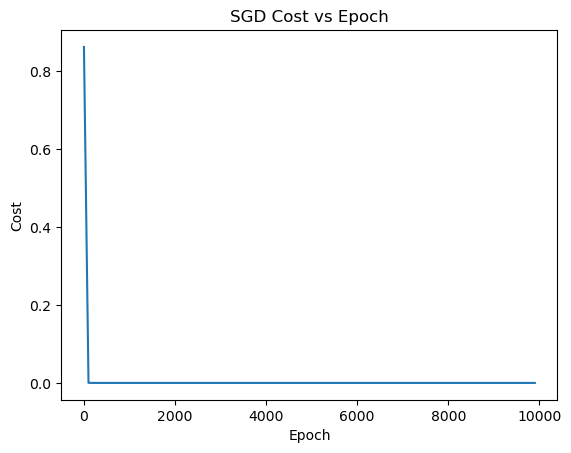

In [48]:
import matplotlib.pyplot as plt

epoch_list_sgd = [i*100 for i in range(len(cost_list_sgd))]

# Plot
plt.plot(epoch_list_sgd, cost_list_sgd)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("SGD Cost vs Epoch")
plt.show()


Now we predict

In [49]:
predict(2600,4,w_sgd, b_sgd) 

C:\Users\muham\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[302801.72413793]])

In [50]:
predict(1000,2,w_sgd, b_sgd)

C:\Users\muham\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[223922.4137931]])

In [51]:
predict(1500,3,w_sgd, b_sgd)

C:\Users\muham\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[255603.44827586]])